# Projet d'Optimisation pour le Machine Learning - Projet 1

Ce projet est realisé par:
* **Ons Ismail**
* **Ons Driss**
* **Chaima Khemiri**
* **Eya Kaabachi**
* **Jihed Bennaas**
* **Elyes Omri**

Dans ce projet, vous allez apprendre un ordinateur `a reconnaitre les chiffres 0 et 1  ́ecrits `à la
main, en utilisant l’optimisation.

## PARTIE 2 :

imporation des librairies

In [1]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

Importation des data "mnist" 

In [4]:
import scipy.io
mat = scipy.io.loadmat('mnist_train_test.mat')

In [5]:
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'd', 'test', 'train'])


In [6]:
df_test=pd.DataFrame(mat['test'].flatten())
df_train=pd.DataFrame(mat['train'].flatten())
df_test , df_train

(                                                   X  \
 0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
 
                                                    y  
 0  [[0], [0], [1], [0], [0], [0], [1], [0], [0], ...  ,
                                                    X  \
 0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
 
                                                    y  
 0  [[0], [1], [1], [0], [0], [1], [0], [1], [0], ...  )

In [7]:
len(mat['train'][0][0][0])

785

In [8]:
len(mat['train'][0][0][1])

12665

On va appliquer le transposé sur les y pour avoir le meme nombre de colonnes

In [21]:
x_train=mat['train'][0][0][0]
x_test=mat['test'][0][0][0]
y_test=np.transpose(mat['test'][0][0][1])
y_train=np.transpose(mat['train'][0][0][1])

In [22]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (785, 12665)
x test:  (785, 2115)
y train:  (1, 12665)
y test:  (1, 2115)


Commençons par initialiser le biais et les thétas "weights"

In [11]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

Puis, on va calculer la fonction sigmoid de notre problème

In [12]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

Pour le forward propagation on va tout d'abord initialiser le z = w.T*x+b et puis on calcul la fonction sigmoid, loss et cost

In [13]:
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilité 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  pour le scaling
    return cost 

#### Algorithme d'Optimization par le Gradient Descent:

Nous devons réduire le cost car, comme nous le savons, si le cost est élevé, cela signifie que nous avons fait une mauvaise prédiction.

On va utiliser la technique de Gradient Descent pour optimiser notre algorithme est minimiser le cost

In [25]:
def gradient_descent(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [26]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = gradient_descent(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [16]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Maintenant, On va calculer notre fonction logistic regression et son accuracy

Cost after iteration 0: -158.186308
Cost after iteration 10: -33.199417
Cost after iteration 20: -17.665682
Cost after iteration 30: -12.130266
Cost after iteration 40: -9.301928
Cost after iteration 50: -7.586175
Cost after iteration 60: -6.434528
Cost after iteration 70: -5.608012
Cost after iteration 80: -4.985900
Cost after iteration 90: -4.500643
Cost after iteration 100: -4.111500
Cost after iteration 110: -3.792439
Cost after iteration 120: -3.526052
Cost after iteration 130: -3.300253
Cost after iteration 140: -3.106392


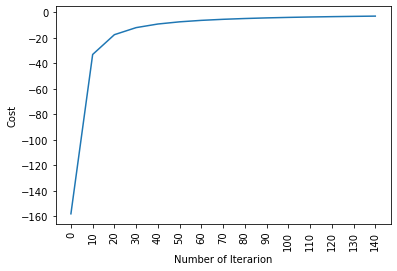

train accuracy: 99.6999605211212 %
test accuracy: 99.8581560283688 %


In [31]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 12665
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

### Autre Methode:

On peut aussi utiliser l'algorithme de réseaux de neurones ANN pour trouver la solution

In [36]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [37]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [38]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [39]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [40]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [41]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.369435
Cost after iteration 100: 0.250313
Cost after iteration 200: 0.146772
Cost after iteration 300: 0.092046
Cost after iteration 400: 0.065007
Cost after iteration 500: 0.049907
Cost after iteration 600: 0.040440
Cost after iteration 700: 0.034000
Cost after iteration 800: 0.029356
Cost after iteration 900: 0.025858
Cost after iteration 1000: 0.023132
Cost after iteration 1100: 0.020951
Cost after iteration 1200: 0.019167
Cost after iteration 1300: 0.017681
Cost after iteration 1400: 0.016425
Cost after iteration 1500: 0.015350
Cost after iteration 1600: 0.014418
Cost after iteration 1700: 0.013603
Cost after iteration 1800: 0.012884
Cost after iteration 1900: 0.012245
Cost after iteration 2000: 0.011672
Cost after iteration 2100: 0.011156
Cost after iteration 2200: 0.010689
Cost after iteration 2300: 0.010263
Cost after iteration 2400: 0.009873


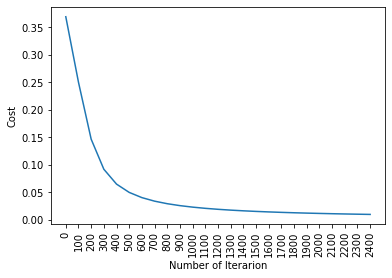

train accuracy: 99.86577181208054 %
test accuracy: 99.95271867612293 %


In [42]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

# PARTIE 3 :

Après avoir appris la logique, nous pouvons utiliser la bibliothèque Scikit-learn qui est plus facile que d'implémenter toutes les étapes à la main pour la régression logistique.

In [30]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


test accuracy: 0.9995271867612293 


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


train accuracy: 1.0 


## Evaluation 

En comparant les 3 méthodes, nous constatons que les 3 donnent des excellents résultats, mais la méthode de Sklearn est plus facile à appliquer, en particulier lorsqu'il s'agit de grandes data à manipuler.